<a href="https://colab.research.google.com/github/Noslen45/Desafio-Data-Analitycs_Frexco/blob/main/Desafio_t%C3%A9cnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando bibliotecas necessárias
Optei por usar o algoritmo Prophet por ser muito interessante para trabalhar com séries temporais e mostrar tendências

In [ ]:
import pandas as pd
from fbprophet import Prophet

#Abrindo os dados e analisando
Primeiro eu tento verificar se tem algum dado nulo ou em formato diferente do que deveria estar

In [ ]:
#Abrindo o arquivo e analisando se tem algum dado a ser tratado
dados_vendas = pd.read_excel('Dados.xlsx')
dados_vendas.head()

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [ ]:
dados_vendas.isna().sum()

Data      0
Vendas    0
dtype: int64

In [ ]:
dados_vendas.shape

(46, 2)

In [ ]:
dados_vendas.dtypes

Data      datetime64[ns]
Vendas             int64
dtype: object

#Gerando gráfico de série temporal

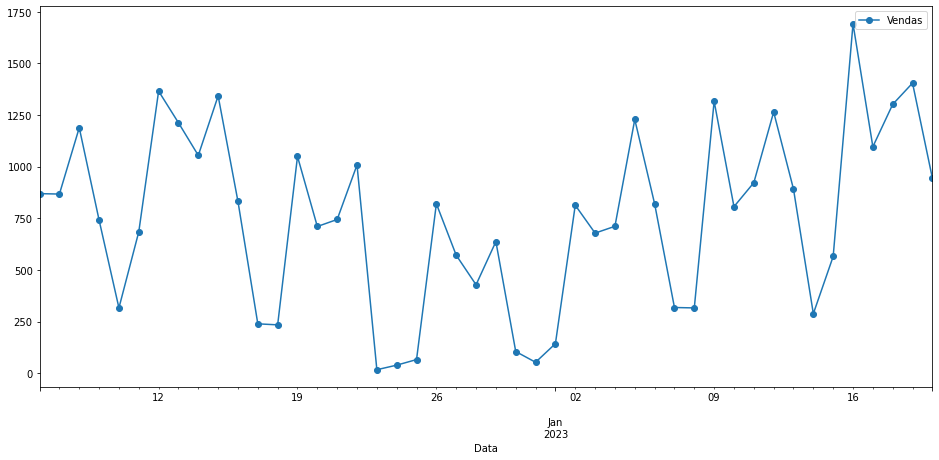

In [ ]:
# Gerando o gráfico dos resultados no passado
dados_vendas.plot(x = 'Data', y = 'Vendas', figsize = (16,7), marker='o')

#Ajustando o modelo aos dados

In [ ]:
# ajustando o conjunto de dados para um formato esperado pelo Prophet
dados_vendas = dados_vendas[['Data', 'Vendas']].rename(columns={'Data':'ds', 'Vendas':'y'})

In [ ]:
modelo_predict = Prophet()
modelo_predict.fit(dados_vendas)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#fazendo o modelo de predição, no caso usando periods=5 pois quero prever os próximos 5 dias
predict=modelo_predict.make_future_dataframe(periods=5,freq='d',include_history=True)
# E também defino que quero usar o período de treino para estimar os dados

In [ ]:
#Gerando as previsões
previsao_Prophet=modelo_predict.predict(predict)
previsao_Prophet.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-12-06,662.587258,435.838834,1100.322410,662.587258,662.587258,110.991661,110.991661,110.991661,110.991661,110.991661,110.991661,0.0,0.0,0.0,773.578918
1,2022-12-07,666.186672,452.395675,1110.496935,666.186672,666.186672,119.481069,119.481069,119.481069,119.481069,119.481069,119.481069,0.0,0.0,0.0,785.667741
2,2022-12-08,669.786087,760.943519,1414.604560,669.786087,669.786087,407.859414,407.859414,407.859414,407.859414,407.859414,407.859414,0.0,0.0,0.0,1077.645501
3,2022-12-09,673.385501,229.924340,867.419692,673.385501,673.385501,-127.573680,-127.573680,-127.573680,-127.573680,-127.573680,-127.573680,0.0,0.0,0.0,545.811821
4,2022-12-10,676.984915,-192.474381,451.529826,676.984915,676.984915,-530.856369,-530.856369,-530.856369,-530.856369,-530.856369,-530.856369,0.0,0.0,0.0,146.128547


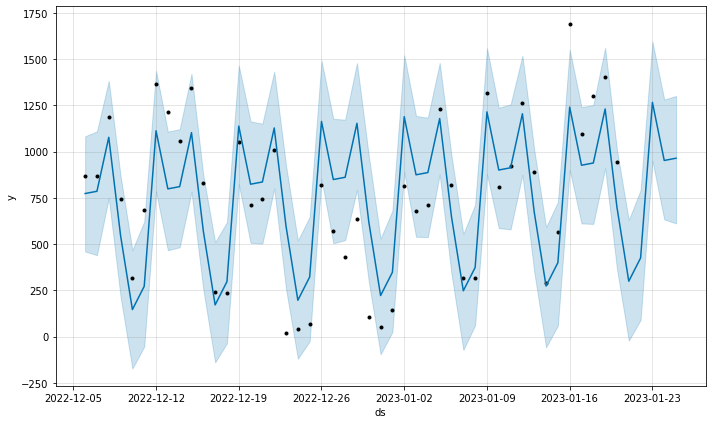

In [ ]:
#plotando o grafico da predição de vendas
grafico_previsao_Prophet = modelo_predict.plot(previsao_Prophet)
grafico_previsao_Prophet.show()

#Criando uma tabela apenas com os valores de previsão

In [ ]:
df=pd.DataFrame(previsao_Prophet, columns=['ds', 'yhat'])
df[(df.index>45)]
#Essa tabela tem as datas e os valores previstos para os 5 dias

,ds,yhat
46,2023-01-21,299.384906
47,2023-01-22,425.262724
48,2023-01-23,1266.380088
49,2023-01-24,952.295293
50,2023-01-25,964.472153


#Conclusão
Na tabela de previsões os valores na coluna 'yhat' são as previsões que o algoritmo fez, dessa forma ele foi treinado para projetar mais 5 dias no futuro, os valores de 'yhat_lower' e 'yhat_upper' são os intervalos de confiança para baixo e para cima respectivamente, no gráfico estão representados com a linha azul clara